# Exercise 11.2
Import libraries and generate data

In [1]:
import os
import tensorflow as tf

W0715 15:39:09.634570 140671119165056 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 4-3*x-2*np.power(x,2)-3*np.power(x,3)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
x_train.sort()

y_target_train = func(x_train) 
y_target_valid = func(x_valid) 

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(func(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(func(x_valid), sigma)

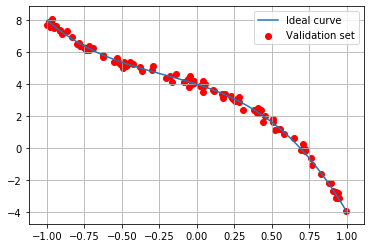

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_train, y_target_train, label="Ideal curve")
plt.scatter(x_valid, y_valid, color='r', label="Validation set" )
plt.legend()
plt.grid(True); plt.show()

## Data Preprocessing
As I wrote in the 11.1, some kind of normalization is needed and here I will do so.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train.reshape(-1,1))
x_valid_scal = scaler.transform(x_valid.reshape(-1,1))

## Building a first model
I build a simple "exploring" NN and evaluate it's performance, later I will use a "trick" to explore different hyperparameters.

### Choosing hyperparameters
Even not knowing that data comes from a third grade polinomial, looking at its representation is straightforward to see that data is simple and comes from some kind of polinomial. Because of that, we don't need much neurons: just an input layer and an output one should be enough. Furthermore, given the low dimension of the polynomial (not havily changing in the interval) 4 or 5 input neurons should be enough. For the activation, in this situation, a function that can both activate and "negative activate" (a kind of suppression) the neuron is useful.  The output layer, instead, must have a linear activation in order to be able to represent all real possible outputs. For the input layer I will use $tanh$; an alternative could be having more neurons and using a $sigmoid$. From my experience, using $relu$ or some other rectified activators for  fitting data that has some polynomial shape works very badly (but, honestly, I wouldn't even use a NN for this kind of data). 

In [5]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = keras.Sequential()
model.add(Dense(units=64, input_shape=(1,), activation="tanh" ))
model.add(Dense(units=1, activation="linear"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'], )

W0715 15:39:10.701508 140671119165056 deprecation.py:506] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
#since on this dataset is very easy to overfit, I use the early stopping
from tensorflow.contrib.keras.api.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(x=x_train_scal, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid_scal, y_valid), callbacks=[es])

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 0s 186us/sample - loss: 4.8231 - mean_squared_error: 4.8231 - val_loss: 0.5785 - val_mean_squared_error: 0.5785
Epoch 2/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.5136 - mean_squared_error: 0.5136 - val_loss: 0.5541 - val_mean_squared_error: 0.5541
Epoch 3/100
1000/1000 [==============================] - 0s 76us/sample - loss: 0.5045 - mean_squared_error: 0.5045 - val_loss: 0.5428 - val_mean_squared_error: 0.5428
Epoch 4/100
1000/1000 [==============================] - 0s 79us/sample - loss: 0.5007 - mean_squared_error: 0.5007 - val_loss: 0.5375 - val_mean_squared_error: 0.5375
Epoch 5/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.4949 - mean_squared_error: 0.4949 - val_loss: 0.5410 - val_mean_squared_error: 0.5410
Epoch 6/100
1000/1000 [==============================] - 0s 79us/sample - loss: 0.4874 - mean_squared_error: 0.4

1000/1000 [==============================] - 0s 76us/sample - loss: 0.2797 - mean_squared_error: 0.2797 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 50/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.2750 - mean_squared_error: 0.2750 - val_loss: 0.3114 - val_mean_squared_error: 0.3114
Epoch 51/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.2707 - mean_squared_error: 0.2707 - val_loss: 0.3048 - val_mean_squared_error: 0.3048
Epoch 52/100
1000/1000 [==============================] - 0s 92us/sample - loss: 0.2664 - mean_squared_error: 0.2664 - val_loss: 0.3074 - val_mean_squared_error: 0.3074
Epoch 53/100
1000/1000 [==============================] - 0s 86us/sample - loss: 0.2636 - mean_squared_error: 0.2636 - val_loss: 0.3109 - val_mean_squared_error: 0.3109
Epoch 54/100
1000/1000 [==============================] - 0s 92us/sample - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.2957 - val_mean_squared_error: 0.2957

1000/1000 [==============================] - 0s 120us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.1115 - val_mean_squared_error: 0.1115
Epoch 98/100
1000/1000 [==============================] - 0s 97us/sample - loss: 0.0887 - mean_squared_error: 0.0887 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 99/100
1000/1000 [==============================] - 0s 98us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 100/100
1000/1000 [==============================] - 0s 98us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1035 - val_mean_squared_error: 0.1035


## Evaluate performance

In [7]:
# evaluate model
score = model.evaluate(x_valid_scal, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
nn_perf=score[1]

100/100 [==============================] - 0s 146us/sample - loss: 0.1035 - mean_squared_error: 0.1035

Validation loss: 0.10354095697402954
Validation accuracy: 0.103540964


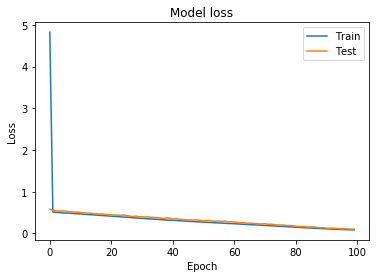

In [8]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

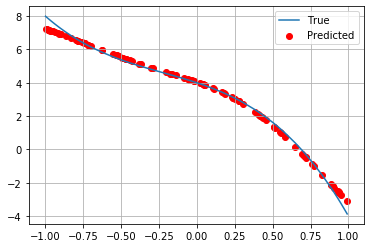

In [9]:

y_predicted = model.predict(x_valid_scal)

#unnormalize data:
x_valid_rev=scaler.inverse_transform(x_valid_scal)

plt.scatter(x_valid_rev, y_predicted,color='r', label="Predicted")
plt.plot(x_valid_rev, y_target_valid, label="True")
plt.legend()
plt.grid(True)
plt.show()

## Exploring hyperparameters space
I will use a powerfull tool of keras and sklearn to explore hyperparameters of the model: the GridSearch.
In the following code I have commented many of the possible parameters to search: this is becouse it's computationally very intense, if you are curious just uncomment.

In [10]:
from sklearn.model_selection import GridSearchCV
from tensorflow.contrib.keras.api.keras.wrappers.scikit_learn import KerasRegressor

#this function is needed for the KerasRegressor
def build_model(units, hidden, optimizer="sgd"):
    model = Sequential()
    model.add(Dense(units = units, activation = "tanh", input_shape = (1,)))
    if(hidden==True):
        model.add(Dense(units = units, activation = "tanh", input_shape = (1,)))
    model.add(Dense(units = 1, activation = 'linear'))                   
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse'])
    return model

#create the model for the grid search
model = KerasRegressor(build_fn=build_model, batch_size=32)

#parameters to explore
#'epochs': [50, 100],

# define the grid search parameters
param_grid={"units":[4,5,6,8],
            "epochs":[50],
            #"epochs": [50, 70, 100],
            #"hidden":[False, True],
            "hidden":[False],
            "optimizer":["sgd","adam"]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, 
                    scoring = 'neg_mean_absolute_error',
                           cv = 3, verbose=2)
grid_result = grid.fit(x_train_scal, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
                   

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   29.9s finished
/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/50
1000/1000 [==============================] - 0s 111us/sample - loss: 19.1451 - mean_squared_error: 19.1451
Epoch 2/50
1000/1000 [==============================] - 0s 54us/sample - loss: 17.5206 - mean_squared_error: 17.5206
Epoch 3/50
1000/1000 [==============================] - 0s 50us/sample - loss: 15.9270 - mean_squared_error: 15.9270
Epoch 4/50
1000/1000 [==============================] - 0s 79us/sample - loss: 14.3566 - mean_squared_error: 14.3566
Epoch 5/50
1000/1000 [==============================] - 0s 74us/sample - loss: 12.8359 - mean_squared_error: 12.8359
Epoch 6/50
1000/1000 [==============================] - 0s 85us/sample - loss: 11.3930 - mean_squared_error: 11.3930
Epoch 7/50
1000/1000 [==============================] - 0s 79us/sample - loss: 10.0266 - mean_squared_error: 10.0266
Epoch 8/50
1000/1000 [==============================] - 0s 80us/sample - loss: 8.7570 - mean_squared_error: 8.7570
Epoch 9/50
1000/1000 [==============================] - 0s 83us/s

Apparently the grid search shows that only one layer is needed, and the best performing number of neurons is usually 6 or 5, but actually this is not really influencing the results. 
The best performing activation is $tanh$. Changing the optimizer is not heavily influencing the result, but Adam is the usually the best performing.

## Plotting some results
To better explore the hyperparameters space I will plot some learning history.

In [11]:
def build_model(units, hidden, optimizer="sgd", activation="tanh") :
    model = Sequential()
    model.add(Dense(units = units, activation = "tanh", input_shape = (1,)))
    if(hidden==True):
        model.add(Dense(units = units, activation = "tanh", input_shape = (1,)))
    model.add(Dense(units = 1, activation = 'linear'))                   
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse'])
    return model

def fit_model(model):
    history = model.fit(x=x_train_scal, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid_scal, y_valid))
    return history

In [12]:
sdg_tanh =build_model(5, False, "sgd", "tanh")
sdg_relu= build_model(5, False, "sgd", "relu")
sdg_hidden = build_model(5, True, "sgd")
adam_tanh = build_model(5,False, "adam", "tanh")
adam_relu = build_model(5,False ,"adam", "relu")
adam_hidden = build_model(5, True, "adam")

sdg_tanh= fit_model(sdg_tanh)
sdg_relu= fit_model(sdg_relu)
sdg_hidden= fit_model(sdg_hidden)
adam_tanh=fit_model(adam_tanh)
adam_relu=fit_model(adam_relu)
adam_hidden=fit_model(adam_hidden)

Train on 1000 samples, validate on 100 samples
Epoch 1/30
1000/1000 [==============================] - 0s 181us/sample - loss: 6.2520 - mean_squared_error: 6.2520 - val_loss: 1.4970 - val_mean_squared_error: 1.4970
Epoch 2/30
1000/1000 [==============================] - 0s 48us/sample - loss: 0.6436 - mean_squared_error: 0.6436 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 3/30
1000/1000 [==============================] - 0s 57us/sample - loss: 0.4202 - mean_squared_error: 0.4202 - val_loss: 0.5049 - val_mean_squared_error: 0.5049
Epoch 4/30
1000/1000 [==============================] - 0s 78us/sample - loss: 0.3974 - mean_squared_error: 0.3974 - val_loss: 0.4854 - val_mean_squared_error: 0.4854
Epoch 5/30
1000/1000 [==============================] - 0s 81us/sample - loss: 0.3846 - mean_squared_error: 0.3846 - val_loss: 0.4733 - val_mean_squared_error: 0.4733
Epoch 6/30
1000/1000 [==============================] - 0s 90us/sample - loss: 0.3744 - mean_squared_error: 0.3744 - 

1000/1000 [==============================] - 0s 55us/sample - loss: 0.2741 - mean_squared_error: 0.2741 - val_loss: 0.3411 - val_mean_squared_error: 0.3411
Epoch 20/30
1000/1000 [==============================] - 0s 58us/sample - loss: 0.2670 - mean_squared_error: 0.2670 - val_loss: 0.3376 - val_mean_squared_error: 0.3376
Epoch 21/30
1000/1000 [==============================] - 0s 53us/sample - loss: 0.2589 - mean_squared_error: 0.2589 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 22/30
1000/1000 [==============================] - 0s 57us/sample - loss: 0.2529 - mean_squared_error: 0.2529 - val_loss: 0.3243 - val_mean_squared_error: 0.3243
Epoch 23/30
1000/1000 [==============================] - 0s 62us/sample - loss: 0.2455 - mean_squared_error: 0.2455 - val_loss: 0.3130 - val_mean_squared_error: 0.3130
Epoch 24/30
1000/1000 [==============================] - 0s 63us/sample - loss: 0.2385 - mean_squared_error: 0.2385 - val_loss: 0.3037 - val_mean_squared_error: 0.3037
Epoc

1000/1000 [==============================] - 0s 75us/sample - loss: 12.7886 - mean_squared_error: 12.7886 - val_loss: 13.5313 - val_mean_squared_error: 13.5313
Epoch 8/30
1000/1000 [==============================] - 0s 84us/sample - loss: 11.5960 - mean_squared_error: 11.5960 - val_loss: 12.2527 - val_mean_squared_error: 12.2527
Epoch 9/30
1000/1000 [==============================] - 0s 68us/sample - loss: 10.4508 - mean_squared_error: 10.4508 - val_loss: 11.0548 - val_mean_squared_error: 11.0548
Epoch 10/30
1000/1000 [==============================] - 0s 72us/sample - loss: 9.3706 - mean_squared_error: 9.3706 - val_loss: 9.9341 - val_mean_squared_error: 9.9341
Epoch 11/30
1000/1000 [==============================] - 0s 65us/sample - loss: 8.3599 - mean_squared_error: 8.3599 - val_loss: 8.8636 - val_mean_squared_error: 8.8636
Epoch 12/30
1000/1000 [==============================] - 0s 58us/sample - loss: 7.4098 - mean_squared_error: 7.4098 - val_loss: 7.8867 - val_mean_squared_error: 7

1000/1000 [==============================] - 0s 83us/sample - loss: 1.4128 - mean_squared_error: 1.4128 - val_loss: 1.7249 - val_mean_squared_error: 1.7249
Epoch 26/30
1000/1000 [==============================] - 0s 71us/sample - loss: 1.2348 - mean_squared_error: 1.2348 - val_loss: 1.5286 - val_mean_squared_error: 1.5286
Epoch 27/30
1000/1000 [==============================] - 0s 86us/sample - loss: 1.0855 - mean_squared_error: 1.0855 - val_loss: 1.3636 - val_mean_squared_error: 1.3636
Epoch 28/30
1000/1000 [==============================] - 0s 84us/sample - loss: 0.9602 - mean_squared_error: 0.9602 - val_loss: 1.2213 - val_mean_squared_error: 1.2213
Epoch 29/30
1000/1000 [==============================] - 0s 92us/sample - loss: 0.8558 - mean_squared_error: 0.8558 - val_loss: 1.1027 - val_mean_squared_error: 1.1027
Epoch 30/30
1000/1000 [==============================] - 0s 91us/sample - loss: 0.7698 - mean_squared_error: 0.7698 - val_loss: 1.0036 - val_mean_squared_error: 1.0036
Trai

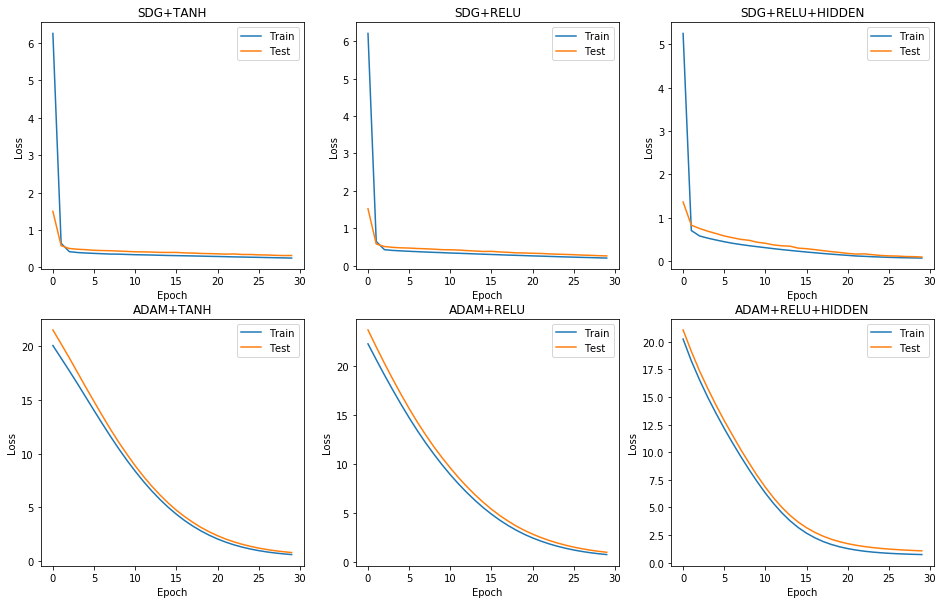

In [13]:
fig,ax = plt.subplots(2, 3, figsize=(16, 10))  

ax[0][0].plot(sdg_tanh.history['loss'])
ax[0][0].plot(sdg_tanh.history['val_loss'])
ax[0][0].set_title('SDG+TANH')
ax[0][0].set_ylabel('Loss')
ax[0][0].set_xlabel('Epoch')
ax[0][0].legend(['Train', 'Test'])



ax[0][1].plot(sdg_relu.history['loss'])
ax[0][1].plot(sdg_relu.history['val_loss'])
ax[0][1].set_title('SDG+RELU')
ax[0][1].set_ylabel('Loss')
ax[0][1].set_xlabel('Epoch')
ax[0][1].legend(['Train', 'Test'])


ax[0][2].plot(sdg_hidden.history['loss'])
ax[0][2].plot(sdg_hidden.history['val_loss'])
ax[0][2].set_title('SDG+RELU+HIDDEN')
ax[0][2].set_ylabel('Loss')
ax[0][2].set_xlabel('Epoch')
ax[0][2].legend(['Train', 'Test'])


ax[1][0].plot(adam_tanh.history['loss'])
ax[1][0].plot(adam_tanh.history['val_loss'])
ax[1][0].set_title('ADAM+TANH')
ax[1][0].set_ylabel('Loss')
ax[1][0].set_xlabel('Epoch')
ax[1][0].legend(['Train', 'Test'])


ax[1][1].plot(adam_relu.history['loss'])
ax[1][1].plot(adam_relu.history['val_loss'])
ax[1][1].set_title('ADAM+RELU')
ax[1][1].set_ylabel('Loss')
ax[1][1].set_xlabel('Epoch')
ax[1][1].legend(['Train', 'Test'])



ax[1][2].plot(adam_hidden.history['loss'])
ax[1][2].plot(adam_hidden.history['val_loss'])
ax[1][2].set_title('ADAM+RELU+HIDDEN')
ax[1][2].set_ylabel('Loss')
ax[1][2].set_xlabel('Epoch')
ax[1][2].legend(['Train', 'Test'])





The behavior of Adam is much smoother than SGD, but this is expected since it's an adaptive optimizer that changes the larning rate avoiding very steep learnings that may lead in wrong parameters space. 

## Chosing one model and exploring features space
I will build a new NN with 5 neurons, one hidden layer, $relu$ as activation and ADAM as optimizer.

In [14]:
model = keras.Sequential()
model.add(Dense(units=5, input_shape=(1,), activation="relu" ))
model.add(Dense(units=5, input_shape=(1,), activation="relu" ))
          
model.add(Dense(units=1, activation="linear"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_squared_error'], )


#es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)


history = model.fit(x=x_train_scal, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid_scal, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 237us/sample - loss: 21.5190 - mean_squared_error: 21.5190 - val_loss: 23.0209 - val_mean_squared_error: 23.0209
Epoch 2/50
1000/1000 [==============================] - 0s 67us/sample - loss: 20.0336 - mean_squared_error: 20.0336 - val_loss: 21.4546 - val_mean_squared_error: 21.4546
Epoch 3/50
1000/1000 [==============================] - 0s 70us/sample - loss: 18.7360 - mean_squared_error: 18.7360 - val_loss: 20.0203 - val_mean_squared_error: 20.0203
Epoch 4/50
1000/1000 [==============================] - 0s 88us/sample - loss: 17.5598 - mean_squared_error: 17.5598 - val_loss: 18.7480 - val_mean_squared_error: 18.7480
Epoch 5/50
1000/1000 [==============================] - 0s 70us/sample - loss: 16.5069 - mean_squared_error: 16.5069 - val_loss: 17.5366 - val_mean_squared_error: 17.5366
Epoch 6/50
1000/1000 [==============================] - 0s 70us/sample - loss: 15.4808 - mean_squ

1000/1000 [==============================] - 0s 103us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0865 - val_mean_squared_error: 0.0865
Epoch 50/50
1000/1000 [==============================] - 0s 104us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0851 - val_mean_squared_error: 0.0851


I check again how it performs on the validation set

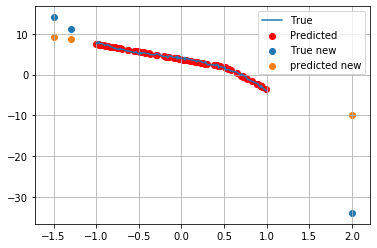

In [15]:
y_predicted = model.predict(x_valid_scal)

#try with some new points out of domain
new_points=np.array([-1.5,-1.3,2])
y_new=func(new_points)
new_points_scal=scaler.transform(new_points.reshape(-1, 1))
y_new_pred=model.predict(new_points_scal)



#unnormalize data:
x_valid_rev=scaler.inverse_transform(x_valid_scal)

plt.scatter(x_valid_rev, y_predicted,color='r', label="Predicted")
plt.plot(x_valid_rev, y_valid, label="True")
plt.scatter(new_points, y_new, label = "True new")
plt.scatter(new_points, y_new_pred, label = "predicted new")
plt.legend()
plt.grid(True)
plt.show()

Out of the interval it's performing very badly. The NN it's not able to generalize on unseen data interval. (And, to be fair, this model is not performing well even on the trained interval).

## Classical Machine Learning Approach
For curiosity, I want to try again how a classical machine learning approach performs. Given the shape of the data, a regression with polynomial basis function is a natural choice. 
Looking at the graph it's clear that the undelying function is some kind of polynomial curve. I will pretend not to know that data is generated by a third grade polynomial (would be cheating), and I will build a model based on a forth grade basis function. Note that with this data also a radial basis function would be able to generalize well, but it would be a quite more complex approach. 

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4) #let's try 4 pretending we don't know how data was generated
x_train_poly = poly_reg.fit_transform(x_train.reshape(-1,1))
x_valid_poly = poly_reg.fit_transform(x_valid.reshape(-1,1))

model.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(x_train_poly))

0.03754814610498939

In [18]:
mean_squared_error(y_valid, model.predict(x_valid_poly))

0.03361135910785437

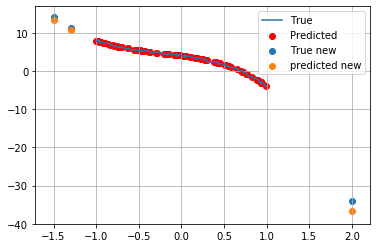

In [19]:
y_predicted = model.predict(x_valid_poly)

new_points_poly=poly_reg.transform(new_points.reshape(-1, 1))
y_new_pred=model.predict(new_points_poly)

plt.scatter(x_valid_rev, y_predicted,color='r', label="Predicted")
plt.plot(x_valid_rev, y_valid, label="True")
plt.scatter(new_points, y_new, label = "True new")
plt.scatter(new_points, y_new_pred, label = "predicted new")
plt.legend()
plt.grid(True)
plt.show()

On this problem a classic approach performed much better on unseen interval (and even on the seen one). With some work it could do even more: I didn't prevent any kind of overfitting, for instance (some regularization may be useful), but still it's a good result! And if you use a 3 grade poly in the preprocessing the result is perfect (but it would be definitily cheating...). However, from my experience, when the problem space is too simple the neural networks usually don't perform well. Things change when the problem becomes complex and not easy to understand any underlying path in the preprocessing and data visualization stage. In that situation choosing a classical approach that fits well is very hard if not impossible.